# Exploratory Data Analysis CLAHE

In [1]:
# Iterating through each folder in the project data directory
import os
import pandas as pd
# Base path where data is stored. 
path_data = "C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_CLAHE\\train\\"
# Walk through data directory
for dirpath, dirnames, filenames in os.walk(path_data):
    if len(filenames) > 0:
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
# Analysis shows that the quanitty of images are balanced for each class
# Training image data quantity can be increased by means of data augmentation whcih will be explored further 

There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\Data\DataSplitted\test\0_normal'.
There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\Data\DataSplitted\test\1_ulcerative_colitis'.
There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\Data\DataSplitted\test\2_polyps'.
There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\Data\DataSplitted\test\3_esophagitis'.
There are 0 directories and 1050 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\Data\DataSplitted\train\0_normal'.
There are 0 directories and 1050 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\Data\DataSplitted\train\1_ulcerative_colitis'.
There are 0 directories and 1050 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\Data\DataSplitted\train\2_polyps'.
There 

In [3]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path(path_data) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print("4 Major Classes are:")
print(class_names)

4 Major Classes are:
['0_normal' '1_ulcerative_colitis' '2_polyps' '3_esophagitis']


In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    """
    Function that plots 3 random images from a directory
    input:
        a) target_dir - folder directory where images are stored
        b) target_class - the class that you want to display the image from
    """
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 3)
    print(random_image)
    plt.figure(figsize = (30,10))
    for i in range(len(random_image)):
        # Read in the image and plot it using matplotlib
        print(random_image[i])
        img = mpimg.imread(target_folder + "/" + random_image[i])
        plt.subplot(1,3,i+1)
        plt.imshow(img)
    plt.rcParams['savefig.facecolor']='red'
    plt.title(target_class)
    
    plt.axis("off");
    plt.show()
#     print(f"Image shape: {img.shape}") # show the shape of the image
#     return img

['val_normal_ (345).jpg', 'train_normal_ (122).jpg', 'train_normal_ (497).jpg']
val_normal_ (345).jpg
train_normal_ (122).jpg
train_normal_ (497).jpg


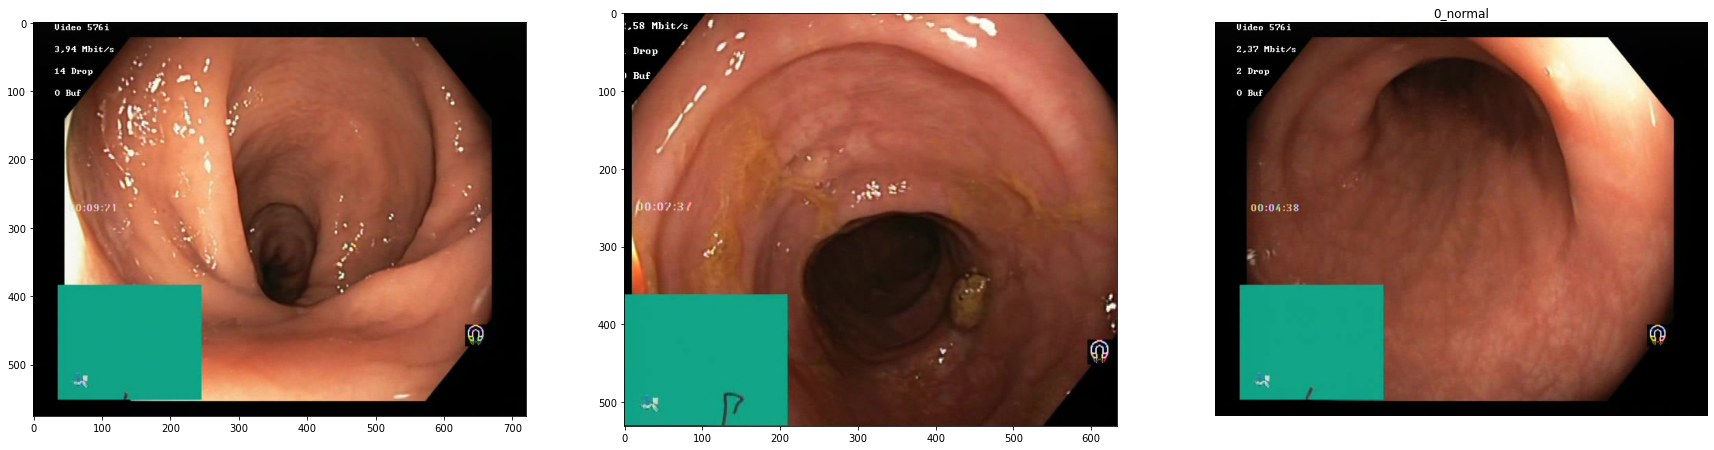

In [5]:
# Plotting images for normal class
basePath = "C:\\Users\\User\\Documents\\Masters in AI\\"
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_CLAHE\\train\\","0_normal_CLAHE")

['val_ulcer_ (225).jpg', 'val_ulcer_ (162).jpg', 'train_ulcer_ (196).jpg']
val_ulcer_ (225).jpg
val_ulcer_ (162).jpg
train_ulcer_ (196).jpg


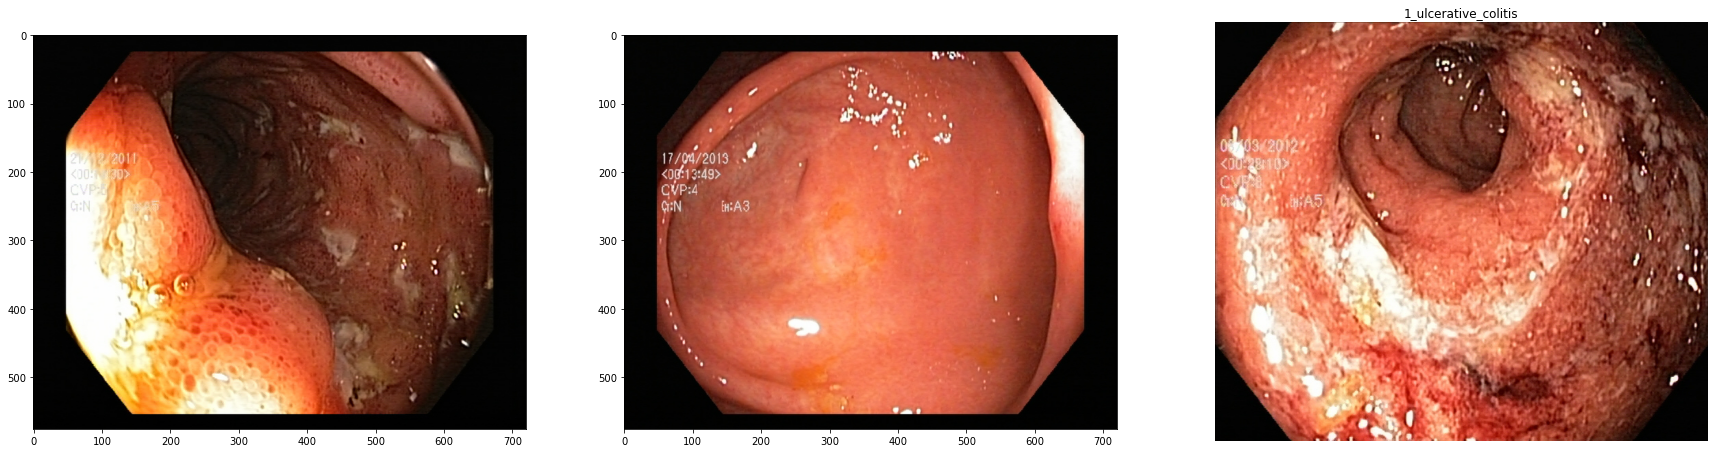

In [6]:
# Plotting images for ulcerative colitis class 
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_CLAHE\\train\\","1_ulcerative_colitis_CLAHE")

['train_polyps_ (452).jpg', 'val_polyps_ (338).jpg', 'train_polyps_ (398).jpg']
train_polyps_ (452).jpg
val_polyps_ (338).jpg
train_polyps_ (398).jpg


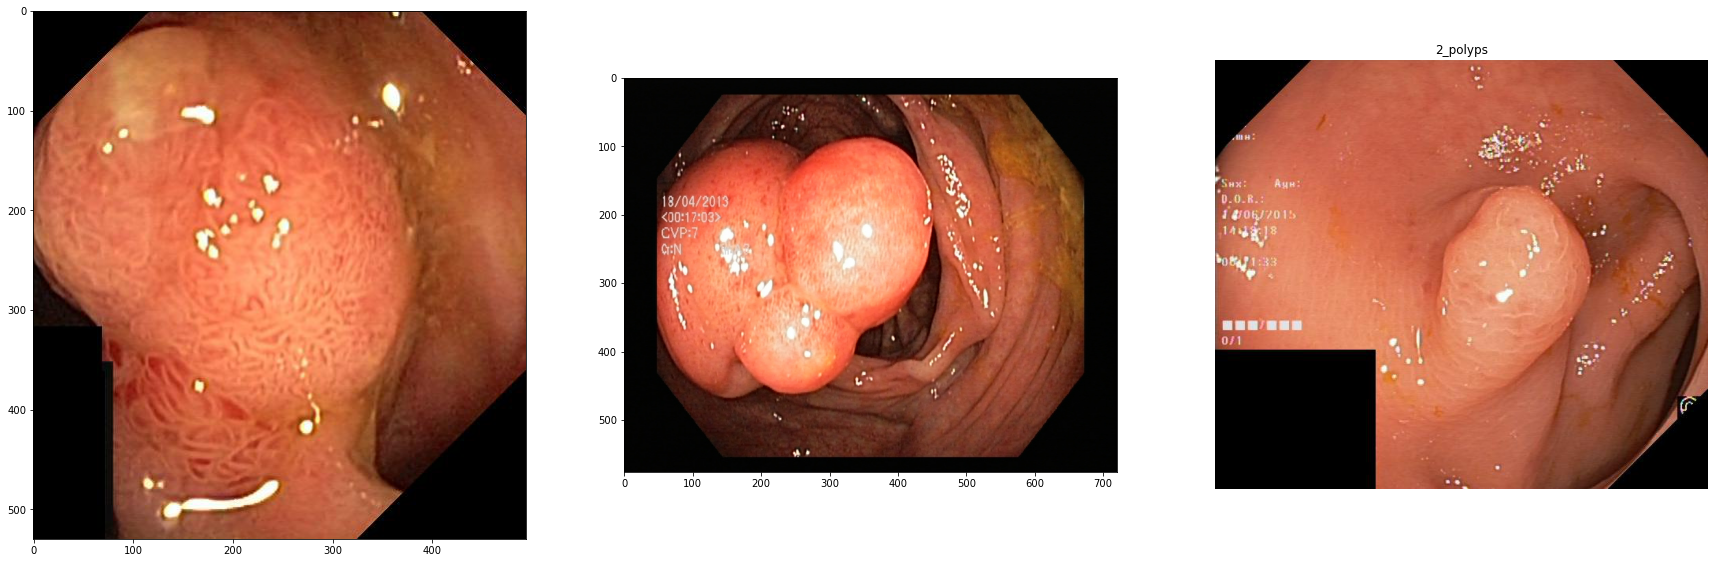

In [7]:
# Plotting images for polyps class 2_polyps
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_CLAHE\\train\\","2_polyps_CLAHE")

['train_esophagitis_ (85).jpg', 'train_esophagitis_ (74).jpg', 'train_esophagitis_ (146).jpg']
train_esophagitis_ (85).jpg
train_esophagitis_ (74).jpg
train_esophagitis_ (146).jpg


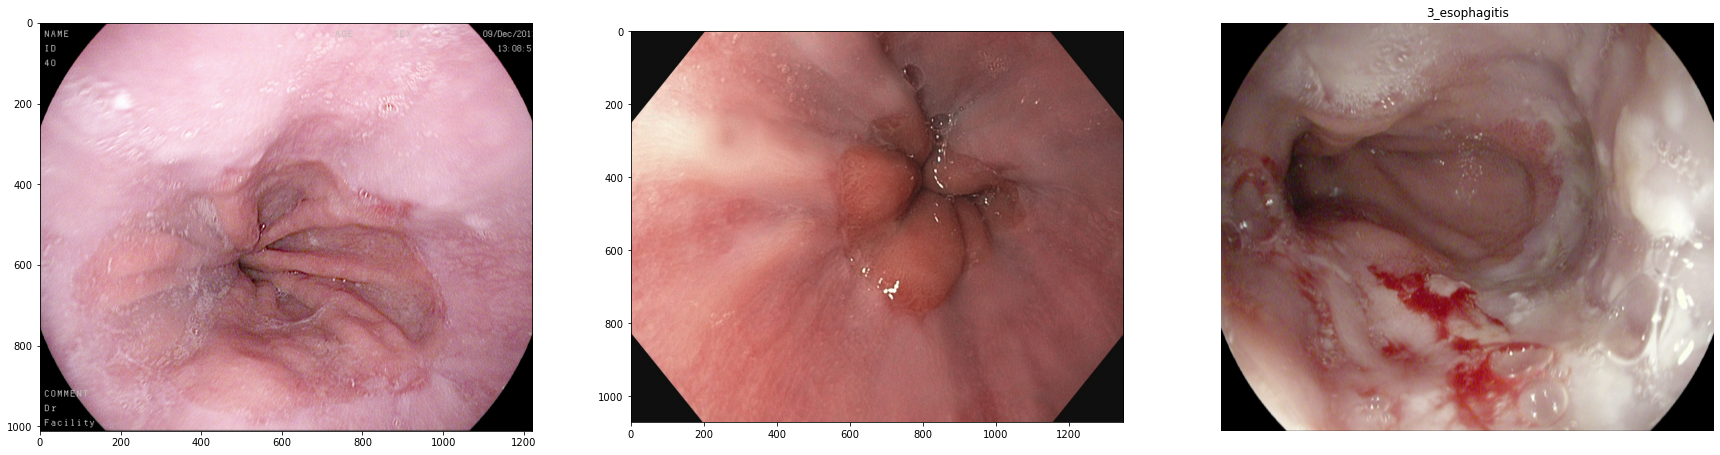

In [8]:
# Plotting images for esophagitis class 3_esophagitis
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_CLAHE\\train\\","3_esophagitis_CLAHE")

In [9]:
# Section to create dataframe of image parameters
# Only limited to training image data
import PIL
from PIL import Image
import cv2

# Now we create a .csv file with the contents / metadata from the entire training dataset. 
trainPath = "C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_CLAHE\\train\\"
trainDir = os.listdir(trainPath)
new_df = pd.DataFrame(columns = ['image_id', 'path','class','width','height','channels','average_R','average_G','average_B'])

In [10]:
# Creating the csv file
# Loop through main project directory where training image is stored, gets the image and its parameters and appends it to the df
for i in range(len(trainDir)):
    listImages = os.listdir(trainPath + trainDir[i])
    for j in range(len(listImages)):
        print(listImages[j])
        imageLocation = trainPath + trainDir[i] + "\\" + listImages[j]
        print(imageLocation)
        
        tempImage = cv2.imread(imageLocation)
        tempImage = cv2.cvtColor(tempImage, cv2.COLOR_BGR2RGB)
        
        tempHeight, tempWidth, tempChannels = np.shape(tempImage)
        
        tempAverage_R = np.mean(tempImage[:,:,0])
        tempAverage_G = np.mean(tempImage[:,:,1])
        tempAverage_B = np.mean(tempImage[:,:,2])
        
        new_df = new_df.append({'image_id' : listImages[j], 'path' : trainDir[i] + "\\" + listImages[j], 
                                'class': trainDir[i],'width': tempWidth,'height': tempHeight,'channels': tempChannels,
                                'average_R': tempAverage_R,'average_G': tempAverage_G,'average_B':tempAverage_B},ignore_index = True)

# Save dataframe to project directory
new_df.to_csv("trainDataAnalysis_CLAHE.csv", index = False)

In [11]:
# Uploading csv file for analysis
df_CLAHE = pd.read_csv("trainDataAnalysis_CLAHE.csv", index_col = False)
df_CLAHE.head()

image_id                              path     class  width  \
0    train_normal_ (1).jpg    0_normal\train_normal_ (1).jpg  0_normal    615   
1   train_normal_ (10).jpg   0_normal\train_normal_ (10).jpg  0_normal    633   
2  train_normal_ (100).jpg  0_normal\train_normal_ (100).jpg  0_normal    633   
3  train_normal_ (101).jpg  0_normal\train_normal_ (101).jpg  0_normal    633   
4  train_normal_ (102).jpg  0_normal\train_normal_ (102).jpg  0_normal    633   

   height  channels   average_R   average_G  average_B  
0     531         3  137.630346   87.531594  69.068691  
1     531         3  141.796705   96.659800  74.475838  
2     532         3  144.548750  106.395343  80.402570  
3     532         3  155.410680   99.276625  75.801441  
4     532         3  119.790816   79.526503  61.595505

In [12]:
# grouping the data based on their mean, medianm,  min and max height and width parameters
df_groupedCLAHE = df_CLAHE.groupby('class').agg({'width': ['mean',"median",'min', 'max'], 'height': ['mean',"median",'min', 'max']})
df_groupedCLAHE

width                        height              \
                             mean median  min   max        mean median  min   
class                                                                         
0_normal               686.335238    720  459   720  559.053333    576  530   
1_ulcerative_colitis   658.807619    627  482  1920  558.131429    532  447   
2_polyps               652.767619    622  332  1920  556.036190    531  352   
3_esophagitis         1256.282857   1225  613  1920  998.212381   1015  523   

                            
                       max  
class                       
0_normal               576  
1_ulcerative_colitis  1080  
2_polyps              1072  
3_esophagitis         1072

In [13]:
# Function to plot the data for visualizing the image size parameters
import pandas as pd
from matplotlib import pyplot as plt
def plotHorizontalBar(y_axis, x_axis,parameterY,parameterX):
    # Figure Size
    fig, ax = plt.subplots(figsize =(10, 5))
    fig.patch.set_facecolor('xkcd:mint green')
    # Horizontal Bar Plot
    ax.barh(y_axis, x_axis)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    ax.set_title(f'Image {parameterY} and their {parameterX}',
                 loc ='center', )

    # Add Text watermark
    # fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
    #          color ='grey', ha ='right', va ='bottom',
    #          alpha = 0.7)
    # Show Plot
    plt.show()

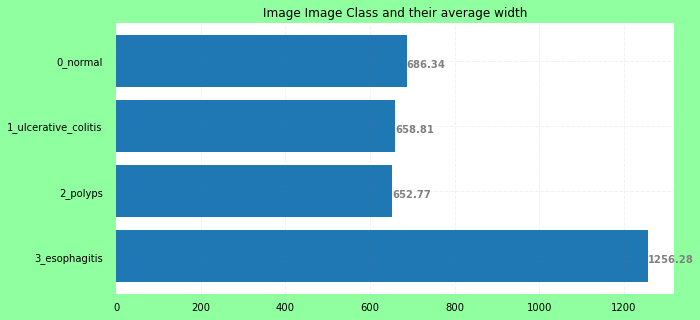

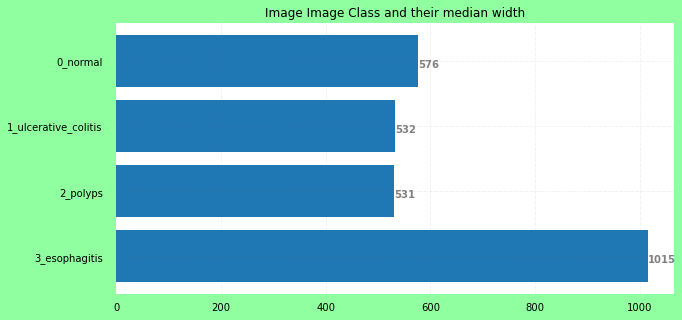

In [14]:
# # Read CSV into pandas 
classes = df_groupedCLAHE.index
avgWidth = df_groupedCLAHE['width']["mean"]
medWidth = df_groupedCLAHE['width']["median"]
avgHeight = df_groupedCLAHE['height']["mean"]
medWidth = df_groupedCLAHE['height']["median"]

plotHorizontalBar(classes,avgWidth,"Image Class","average width")
plotHorizontalBar(classes,medWidth,"Image Class","median width")
# esogophitis class has the biggest image size averaging around 1.2K in average and 1K in median.(consider average)
# Other classes have image size of around 650 on average and 550 in median (i think for this we consider the average)

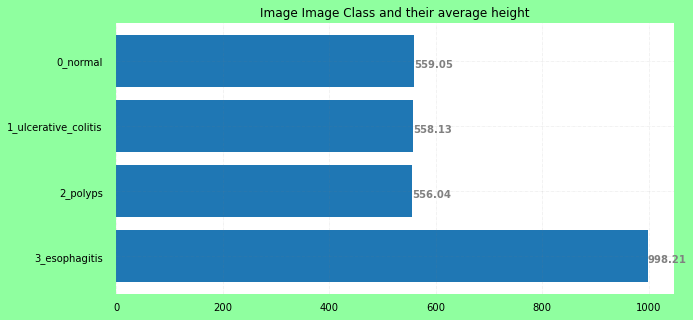

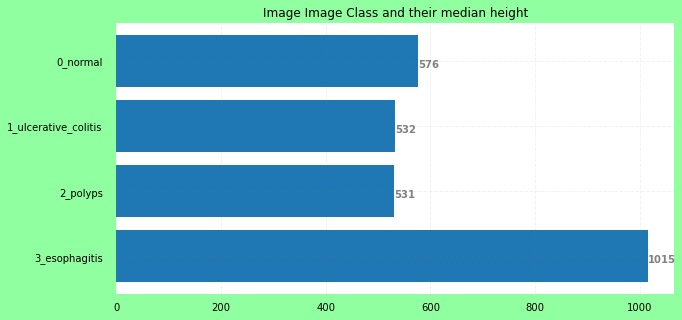

In [15]:
plotHorizontalBar(classes,avgHeight,"Image Class","average height")
plotHorizontalBar(classes,medWidth,"Image Class","median height")

# average height of esogophiotis is around 1K (average) whereas the rest circle around 550
# Median wise the esogophitis is around 1K as well with the rest being around 550

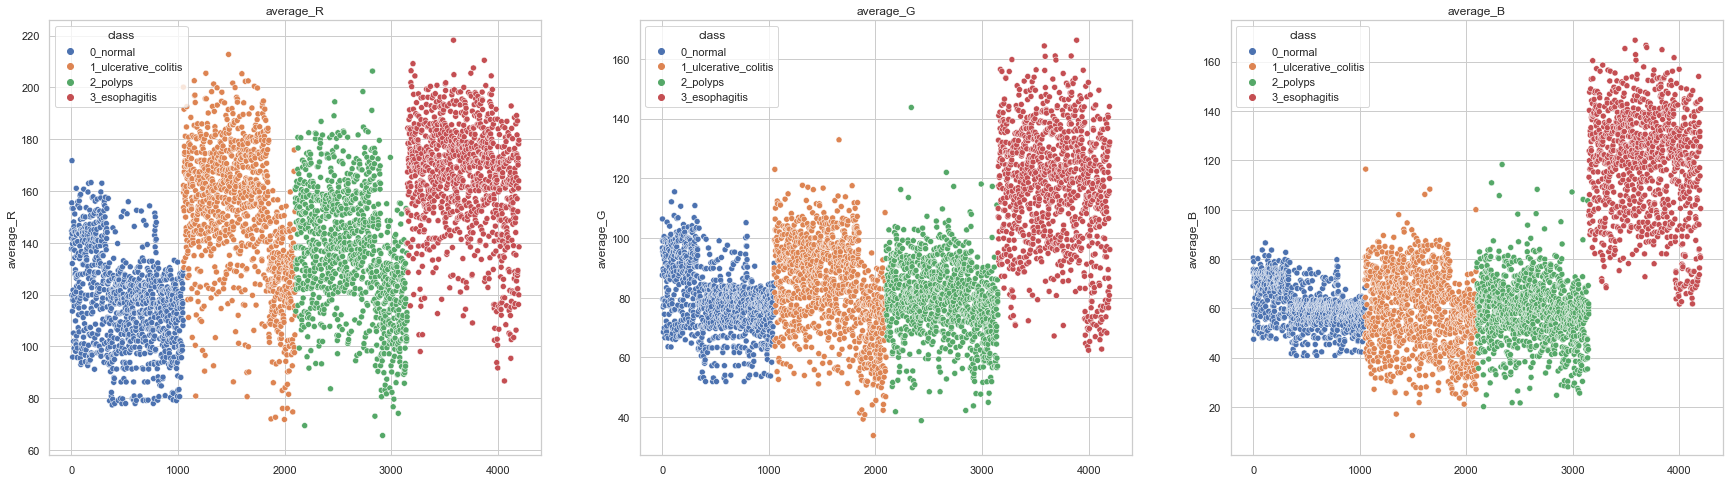

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [28]:
def scatterPlot(x,y,hue,dataset, figure, axes, position, title):
    """
    SNS scatterplot function to plot the average RGB values for training iamges for visualization
    """
    import seaborn
    seaborn.set(style='whitegrid')
    plt.figure(figsize = (10,5))
    seaborn.scatterplot(x=x,
                        y=y,
                        hue=hue,
                        data=dataset, ax = axes[position]).set_title(title)
# Ploitting for RGB
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
scatterPlot(df_CLAHE.index,"average_R","class",df_CLAHE, fig, axes, 0,'average_R')
scatterPlot(df_CLAHE.index,"average_G","class",df_CLAHE,fig, axes, 1,'average_G')
scatterPlot(df_CLAHE.index,"average_B","class",df_CLAHE,fig, axes, 2,"average_B")

# On average, the color spectrum for all 3 is highest for the esogophitis class
# Looking at the green and blue spectrum, we see that the other classes have lower intensities as compare to esogophitis
# For Red color other classes exhibit higher values of pixels
# The normal class has the lowest concentration of pixels for all 3 RGB channels

Text(0.5, 1.0, 'Average B')

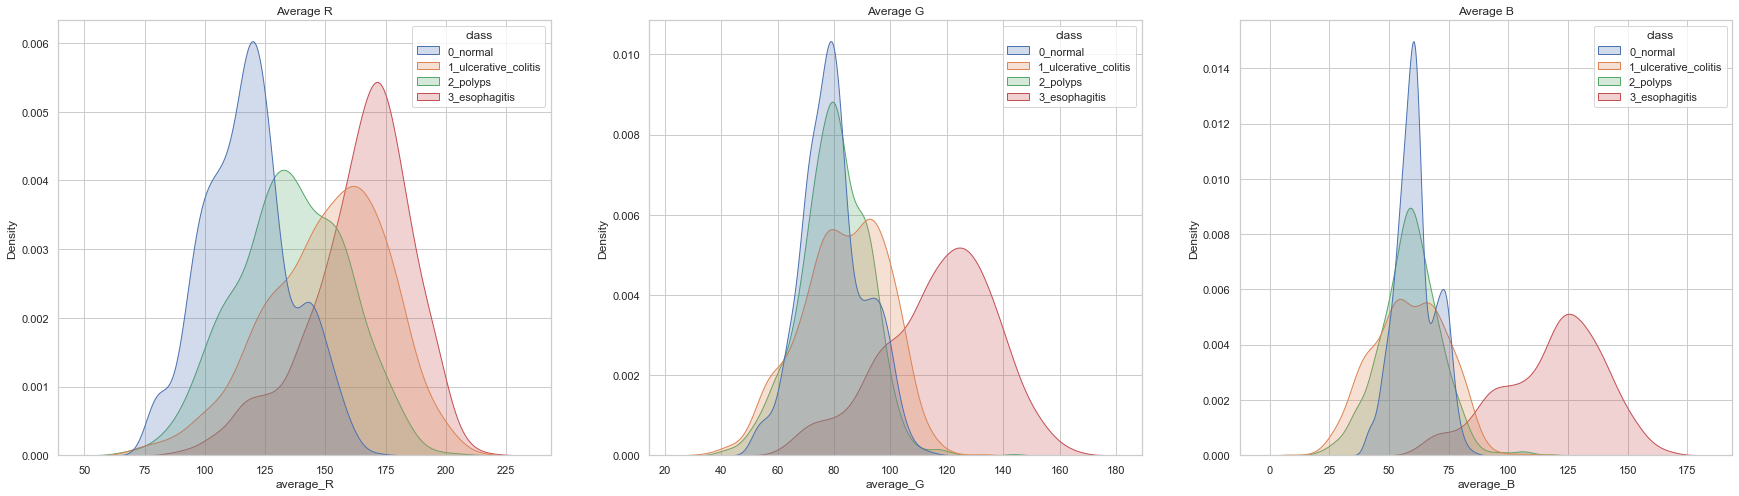

In [17]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
sns.kdeplot(data = df_CLAHE, x="average_R", hue="class", fill=True, ax = axes[0]).set_title("Average R")
sns.kdeplot(data = df_CLAHE, x="average_G", hue="class", fill=True, ax = axes[1]).set_title("Average G")
sns.kdeplot(data = df_CLAHE, x="average_B", hue="class", fill=True, ax = axes[2]).set_title("Average B")

# Pixel values are generally higher for esogophitis (this may make it more easily distinguihable) - The most distinct color that distinguishes is the G and B channels
# For normal class, the pixel values are much lower in value and are highly concentrated at that region
# To distinguish between ulverative and polyps, the RED channel may play the biggest role as the average values peak most distinguishabaly for this color channel followed by G and lastly B
# for B channel, it looks like it's very hard to distinguish between the G and B values. 

# The range of values. The R is the highest values from 0 - 255
# G is in the middle
# B is the lowest amongst all 3

Text(0.5, 1.0, '3_esophagitis')

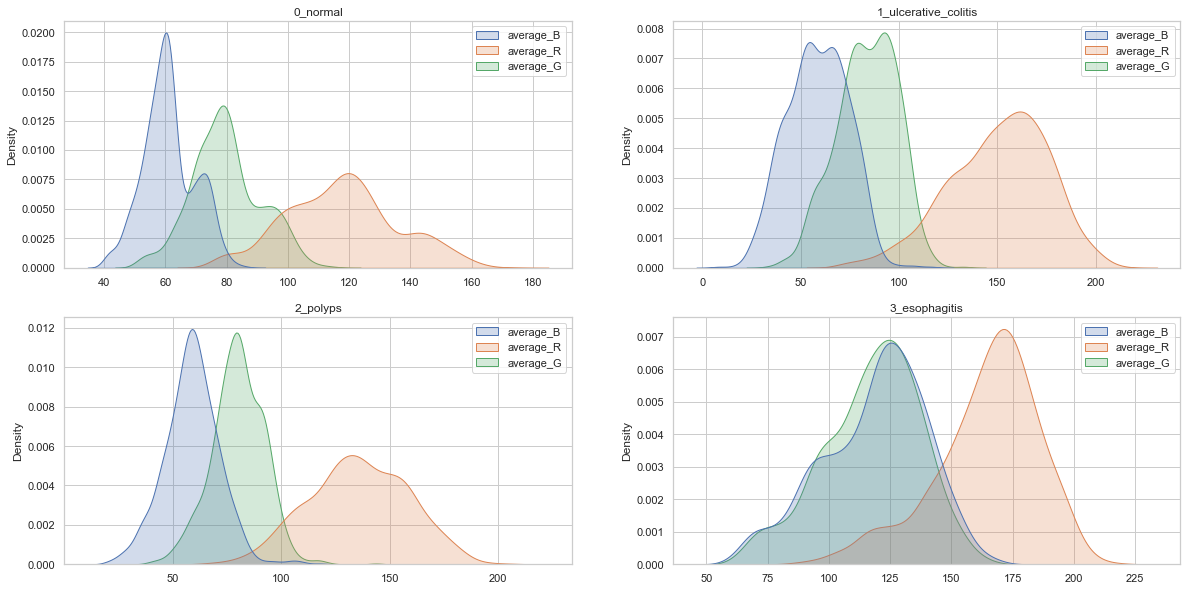

In [18]:
fig, axes = plt.subplots(figsize=(20,10), ncols=2, nrows=2)

df_normal = df_CLAHE.loc[df_CLAHE["class"] == "0_normal"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True,ax = axes[0,0]).set_title("0_normal")

df_normal = df_CLAHE.loc[df_CLAHE["class"] == "1_ulcerative_colitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[0,1]).set_title("1_ulcerative_colitis")

df_normal = df_CLAHE.loc[df_CLAHE["class"] == "2_polyps"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,0]).set_title("2_polyps")

df_normal = df_CLAHE.loc[df_CLAHE["class"] == "3_esophagitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,1]).set_title("3_esophagitis")

# Analyse each class on RGB values
# For all you see that the intensity of the RED  is the highest in images for all classes. 

# For normal, the peak of pixel values is at different distinct locations for RGB with the RED being the pixel with highest intensity and Red being the most spread out.  
# The intensity is also the lowest amongst all the other classes

# For ulcerative we observe that the B and G values are more spread out and overlapping but the red is distinctly peaking at a separate location. 
# Pattern remains the same where B and G peak quite sharplu and the red is more spread out
# Its range of values is also higher making it the 2nd highest for all 3 channels when comapred to other classes. 

# For polyps, we see that the B and G peak sharply at 2 different locations, and they are more concentrated at their particular regions. 
# Red on the other hand is more spread out but at a distinct different location
# The intensity of the pixel values are the 3rd highest as compared to the other classes. 

# Lastly for esogophitis. The pixel values for B and G is more spread out but also highly overlapping
# We see that the red channel dominates the entire image. 
# the pixel intensity values are also highest as comapred to the other 3. 
# The values are moderately spread out.

# Exploratory Data Analysis MULTISCALE

In [4]:
# Iterating through each folder in the project data directory
import os
import pandas as pd
# Base path where data is stored. 
path_data = "C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\"
# Walk through data directory
for dirpath, dirnames, filenames in os.walk(path_data):
    if len(filenames) > 0:
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
# Analysis shows that the quanitty of images are balanced for each class
# Training image data quantity can be increased by means of data augmentation whcih will be explored further 

In [5]:
# # Total number of training_validation_test images
# TrainSize = 1050 * 4
# ValSize = 150 * 4 
# TestSize = 300 * 4
# print(f"Training Dataset Size : {TrainSize}")
# print(f"Validation Dataset Size : {ValSize}")
# print(f"Test Dataset Size : {TestSize}")

In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path(path_data) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print("4 Major Classes are:")
print(class_names)

4 Major Classes are:
[]


In [7]:
# Plotting images for normal class
basePath = "C:\\Users\\User\\Documents\\Masters in AI\\"
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\","0_normal_Multiscale")

NameError: name 'view_random_image' is not defined

In [ ]:
# Plotting images for ulcerative colitis class 
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\","1_ulcerative_colitis_Multiscale")

In [ ]:
# Plotting images for polyps class 2_polyps
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\","2_polyps_Multiscale")

In [8]:
# Plotting images for esophagitis class 3_esophagitis
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\","3_esophagitis_Multiscale")

NameError: name 'view_random_image' is not defined

In [9]:
# Section to create dataframe of image parameters
# Only limited to training image data
import PIL
from PIL import Image
import cv2

# Now we create a .csv file with the contents / metadata from the entire training dataset. 
trainPath = "C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\"
trainDir = os.listdir(trainPath)
new_df = pd.DataFrame(columns = ['image_id', 'path','class','width','height','channels','average_R','average_G','average_B'])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\'

In [ ]:
# Creating the csv file
# Loop through main project directory where training image is stored, gets the image and its parameters and appends it to the df
for i in range(len(trainDir)):
    listImages = os.listdir(trainPath + trainDir[i])
    for j in range(len(listImages)):
        print(listImages[j])
        imageLocation = trainPath + trainDir[i] + "\\" + listImages[j]
        print(imageLocation)
        
        tempImage = cv2.imread(imageLocation)
        tempImage = cv2.cvtColor(tempImage, cv2.COLOR_BGR2RGB)
        
        tempHeight, tempWidth, tempChannels = np.shape(tempImage)
        
        tempAverage_R = np.mean(tempImage[:,:,0])
        tempAverage_G = np.mean(tempImage[:,:,1])
        tempAverage_B = np.mean(tempImage[:,:,2])
        
        new_df = new_df.append({'image_id' : listImages[j], 'path' : trainDir[i] + "\\" + listImages[j], 
                                'class': trainDir[i],'width': tempWidth,'height': tempHeight,'channels': tempChannels,
                                'average_R': tempAverage_R,'average_G': tempAverage_G,'average_B':tempAverage_B},ignore_index = True)

# Save dataframe to project directory
new_df.to_csv("trainDataAnalysis_Multiscale.csv", index = False)

In [10]:
# Uploading csv file for analysis
df_Multiscale = pd.read_csv("trainDataAnalysis_Multiscale.csv", index_col = False)
df_Multiscale.head()

FileNotFoundError: [Errno 2] No such file or directory: 'trainDataAnalysis_Multiscale.csv'

In [11]:
# grouping the data based on their mean, medianm,  min and max height and width parameters
df_groupedMultiscale = df_Multiscale.groupby('class').agg({'width': ['mean',"median",'min', 'max'], 'height': ['mean',"median",'min', 'max']})
df_groupedMultiscale

NameError: name 'df_Multiscale' is not defined

In [12]:
# # Read CSV into pandas 
classes = df_groupedMultiscale.index
avgWidth = df_groupedMultiscale['width']["mean"]
medWidth = df_groupedMultiscale['width']["median"]
avgHeight = df_groupedMultiscale['height']["mean"]
medWidth = df_groupedMultiscale['height']["median"]

plotHorizontalBar(classes,avgWidth,"Image Class","average width")
plotHorizontalBar(classes,medWidth,"Image Class","median width")
# esogophitis class has the biggest image size averaging around 1.2K in average and 1K in median.(consider average)
# Other classes have image size of around 650 on average and 550 in median (i think for this we consider the average)

NameError: name 'df_groupedMultiscale' is not defined

In [13]:
plotHorizontalBar(classes,avgHeight,"Image Class","average height")
plotHorizontalBar(classes,medWidth,"Image Class","median height")

# average height of esogophiotis is around 1K (average) whereas the rest circle around 550
# Median wise the esogophitis is around 1K as well with the rest being around 550

NameError: name 'plotHorizontalBar' is not defined

In [14]:
# Plotting for RGB
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
scatterPlot(df_Multiscale.index,"average_R","class",df_Multiscale, fig, axes, 0,'average_R')
scatterPlot(df_Multiscale.index,"average_G","class",df_Multiscale,fig, axes, 1,'average_G')
scatterPlot(df_Multiscale.index,"average_B","class",df_Multiscale,fig, axes, 2,"average_B")

# On average, the color spectrum for all 3 is highest for the esogophitis class
# Looking at the green and blue spectrum, we see that the other classes have lower intensities as compare to esogophitis
# For Red color other classes exhibit higher values of pixels
# The normal class has the lowest concentration of pixels for all 3 RGB channels

NameError: name 'plt' is not defined

In [15]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
sns.kdeplot(data = df_Multiscale, x="average_R", hue="class", fill=True, ax = axes[0]).set_title("Average R")
sns.kdeplot(data = df_Multiscale, x="average_G", hue="class", fill=True, ax = axes[1]).set_title("Average G")
sns.kdeplot(data = df_Multiscale, x="average_B", hue="class", fill=True, ax = axes[2]).set_title("Average B")

# Pixel values are generally higher for esogophitis (this may make it more easily distinguihable) - The most distinct color that distinguishes is the G and B channels
# For normal class, the pixel values are much lower in value and are highly concentrated at that region
# To distinguish between ulverative and polyps, the RED channel may play the biggest role as the average values peak most distinguishabaly for this color channel followed by G and lastly B
# for B channel, it looks like it's very hard to distinguish between the G and B values. 

# The range of values. The R is the highest values from 0 - 255
# G is in the middle
# B is the lowest amongst all 3

NameError: name 'plt' is not defined

In [ ]:
fig, axes = plt.subplots(figsize=(20,10), ncols=2, nrows=2)

df_normal = df_Multiscale.loc[df_Multiscale["class"] == "0_normal"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True,ax = axes[0,0]).set_title("0_normal")

df_normal = df_Multiscale.loc[df_Multiscale["class"] == "1_ulcerative_colitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[0,1]).set_title("1_ulcerative_colitis")

df_normal = df_Multiscale.loc[df_Multiscale["class"] == "2_polyps"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,0]).set_title("2_polyps")

df_normal = df_Multiscale.loc[df_Multiscale["class"] == "3_esophagitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,1]).set_title("3_esophagitis")

# Analyse each class on RGB values
# For all you see that the intensity of the RED  is the highest in images for all classes. 

# For normal, the peak of pixel values is at different distinct locations for RGB with the RED being the pixel with highest intensity and Red being the most spread out.  
# The intensity is also the lowest amongst all the other classes

# For ulcerative we observe that the B and G values are more spread out and overlapping but the red is distinctly peaking at a separate location. 
# Pattern remains the same where B and G peak quite sharplu and the red is more spread out
# Its range of values is also higher making it the 2nd highest for all 3 channels when comapred to other classes. 

# For polyps, we see that the B and G peak sharply at 2 different locations, and they are more concentrated at their particular regions. 
# Red on the other hand is more spread out but at a distinct different location
# The intensity of the pixel values are the 3rd highest as compared to the other classes. 

# Lastly for esogophitis. The pixel values for B and G is more spread out but also highly overlapping
# We see that the red channel dominates the entire image. 
# the pixel intensity values are also highest as comapred to the other 3. 
# The values are moderately spread out.

In [ ]:
hfghjfghjfghj

# Exploratory Data Analysis RAYLEIGH

In [4]:
# Iterating through each folder in the project data directory
import os
import pandas as pd
# Base path where data is stored. 
path_data = "C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Rayleigh\\train\\"
# Walk through data directory
for dirpath, dirnames, filenames in os.walk(path_data):
    if len(filenames) > 0:
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
# Analysis shows that the quanitty of images are balanced for each class
# Training image data quantity can be increased by means of data augmentation whcih will be explored further 

In [5]:
# # Total number of training_validation_test images
# TrainSize = 1050 * 4
# ValSize = 150 * 4 
# TestSize = 300 * 4
# print(f"Training Dataset Size : {TrainSize}")
# print(f"Validation Dataset Size : {ValSize}")
# print(f"Test Dataset Size : {TestSize}")

In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path(path_data) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print("4 Major Classes are:")
print(class_names)

4 Major Classes are:
[]


In [7]:
# Plotting images for normal class
basePath = "C:\\Users\\User\\Documents\\Masters in AI\\"
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Rayleigh\\train\\","0_normal_Rayleigh")

NameError: name 'view_random_image' is not defined

In [ ]:
# Plotting images for ulcerative colitis class 
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Rayleigh\\train\\","1_ulcerative_colitis_Rayleigh")

In [ ]:
# Plotting images for polyps class 2_polyps
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Rayleigh\\train\\","2_polyps_Rayleigh")

In [8]:
# Plotting images for esophagitis class 3_esophagitis
view_random_image(basePath + "GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Rayleigh\\train\\","3_esophagitis_Rayleigh")

NameError: name 'view_random_image' is not defined

In [9]:
# Section to create dataframe of image parameters
# Only limited to training image data
import PIL
from PIL import Image
import cv2

# Now we create a .csv file with the contents / metadata from the entire training dataset. 
trainPath = "C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Rayleigh
\\train\\"
trainDir = os.listdir(trainPath)
new_df = pd.DataFrame(columns = ['image_id', 'path','class','width','height','channels','average_R','average_G','average_B'])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\Dataset\\Dataset_Multiscale\\train\\'

In [ ]:
# Creating the csv file
# Loop through main project directory where training image is stored, gets the image and its parameters and appends it to the df
for i in range(len(trainDir)):
    listImages = os.listdir(trainPath + trainDir[i])
    for j in range(len(listImages)):
        print(listImages[j])
        imageLocation = trainPath + trainDir[i] + "\\" + listImages[j]
        print(imageLocation)
        
        tempImage = cv2.imread(imageLocation)
        tempImage = cv2.cvtColor(tempImage, cv2.COLOR_BGR2RGB)
        
        tempHeight, tempWidth, tempChannels = np.shape(tempImage)
        
        tempAverage_R = np.mean(tempImage[:,:,0])
        tempAverage_G = np.mean(tempImage[:,:,1])
        tempAverage_B = np.mean(tempImage[:,:,2])
        
        new_df = new_df.append({'image_id' : listImages[j], 'path' : trainDir[i] + "\\" + listImages[j], 
                                'class': trainDir[i],'width': tempWidth,'height': tempHeight,'channels': tempChannels,
                                'average_R': tempAverage_R,'average_G': tempAverage_G,'average_B':tempAverage_B},ignore_index = True)

# Save dataframe to project directory
new_df.to_csv("trainDataAnalysis_Rayleigh.csv", index = False)

In [10]:
# Uploading csv file for analysis
df_Rayleigh = pd.read_csv("trainDataAnalysis_Rayleigh.csv", index_col = False)
df_Rayleigh.head()

FileNotFoundError: [Errno 2] No such file or directory: 'trainDataAnalysis_Multiscale.csv'

In [11]:
# grouping the data based on their mean, medianm,  min and max height and width parameters
df_groupedRayleigh = df_Rayleigh.groupby('class').agg({'width': ['mean',"median",'min', 'max'], 'height': ['mean',"median",'min', 'max']})
df_groupedRayleigh

NameError: name 'df_Multiscale' is not defined

In [12]:
# # Read CSV into pandas 
classes = df_groupedRayleigh.index
avgWidth = df_groupedRayleigh['width']["mean"]
medWidth = df_groupedRayleigh['width']["median"]
avgHeight = df_groupedRayleigh['height']["mean"]
medWidth = df_groupedRayleigh['height']["median"]

plotHorizontalBar(classes,avgWidth,"Image Class","average width")
plotHorizontalBar(classes,medWidth,"Image Class","median width")
# esogophitis class has the biggest image size averaging around 1.2K in average and 1K in median.(consider average)
# Other classes have image size of around 650 on average and 550 in median (i think for this we consider the average)

NameError: name 'df_groupedMultiscale' is not defined

In [13]:
plotHorizontalBar(classes,avgHeight,"Image Class","average height")
plotHorizontalBar(classes,medWidth,"Image Class","median height")

# average height of esogophiotis is around 1K (average) whereas the rest circle around 550
# Median wise the esogophitis is around 1K as well with the rest being around 550

NameError: name 'plotHorizontalBar' is not defined

In [14]:
# Plotting for RGB
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
scatterPlot(df_Rayleigh.index,"average_R","class",df_Multiscale, fig, axes, 0,'average_R')
scatterPlot(df_Rayleigh.index,"average_G","class",df_Multiscale,fig, axes, 1,'average_G')
scatterPlot(df_Rayleigh.index,"average_B","class",df_Multiscale,fig, axes, 2,"average_B")

# On average, the color spectrum for all 3 is highest for the esogophitis class
# Looking at the green and blue spectrum, we see that the other classes have lower intensities as compare to esogophitis
# For Red color other classes exhibit higher values of pixels
# The normal class has the lowest concentration of pixels for all 3 RGB channels

NameError: name 'plt' is not defined

In [15]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
sns.kdeplot(data = df_Rayleigh, x="average_R", hue="class", fill=True, ax = axes[0]).set_title("Average R")
sns.kdeplot(data = df_Rayleigh, x="average_G", hue="class", fill=True, ax = axes[1]).set_title("Average G")
sns.kdeplot(data = df_Rayleigh, x="average_B", hue="class", fill=True, ax = axes[2]).set_title("Average B")

# Pixel values are generally higher for esogophitis (this may make it more easily distinguihable) - The most distinct color that distinguishes is the G and B channels
# For normal class, the pixel values are much lower in value and are highly concentrated at that region
# To distinguish between ulverative and polyps, the RED channel may play the biggest role as the average values peak most distinguishabaly for this color channel followed by G and lastly B
# for B channel, it looks like it's very hard to distinguish between the G and B values. 

# The range of values. The R is the highest values from 0 - 255
# G is in the middle
# B is the lowest amongst all 3

NameError: name 'plt' is not defined

In [ ]:
fig, axes = plt.subplots(figsize=(20,10), ncols=2, nrows=2)

df_normal = df_Rayleigh.loc[df_Rayleigh["class"] == "0_normal"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True,ax = axes[0,0]).set_title("0_normal")

df_normal = df_Rayleigh.loc[df_Rayleigh["class"] == "1_ulcerative_colitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[0,1]).set_title("1_ulcerative_colitis")

df_normal = df_Rayleigh.loc[df_Rayleigh["class"] == "2_polyps"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,0]).set_title("2_polyps")

df_normal = df_Rayleigh.loc[df_Rayleigh["class"] == "3_esophagitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,1]).set_title("3_esophagitis")

# Analyse each class on RGB values
# For all you see that the intensity of the RED  is the highest in images for all classes. 

# For normal, the peak of pixel values is at different distinct locations for RGB with the RED being the pixel with highest intensity and Red being the most spread out.  
# The intensity is also the lowest amongst all the other classes

# For ulcerative we observe that the B and G values are more spread out and overlapping but the red is distinctly peaking at a separate location. 
# Pattern remains the same where B and G peak quite sharplu and the red is more spread out
# Its range of values is also higher making it the 2nd highest for all 3 channels when comapred to other classes. 

# For polyps, we see that the B and G peak sharply at 2 different locations, and they are more concentrated at their particular regions. 
# Red on the other hand is more spread out but at a distinct different location
# The intensity of the pixel values are the 3rd highest as compared to the other classes. 

# Lastly for esogophitis. The pixel values for B and G is more spread out but also highly overlapping
# We see that the red channel dominates the entire image. 
# the pixel intensity values are also highest as comapred to the other 3. 
# The values are moderately spread out.

# Analysing Image Processsed Data

In [2]:
dfIPCV = pd.read_csv("C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\ImageProcessingExperimentation\\trainDataAnalysisIPCV_Comparison.csv")
dfIPCV.head()

NameError: name 'pd' is not defined

In [3]:
def scatterPlot(x,y,hue,dataset, figure, axes, position, title):
    """
    SNS scatterplot function to plot the average RGB values for training iamges for visualization
    """
    import seaborn
    seaborn.set(style='whitegrid')
    plt.figure(figsize = (10,5))
    seaborn.scatterplot(x=x,
                        y=y,
                        hue=hue,
                        data=dataset, ax = axes[position]).set_title(title)
# Ploitting for RGB
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
scatterPlot(dfIPCV.index,"PSNR_CLAHE","class",dfIPCV, fig, axes, 0,'PSNR_CLAHE')
scatterPlot(dfIPCV.index,"PSNR_MULTISCALE","class",dfIPCV,fig, axes, 1,'PSNR_MULTISCALE')
scatterPlot(dfIPCV.index,"PSNR_RAYLEIGH","class",dfIPCV,fig, axes, 2,"PSNR_RAYLEIGH")

NameError: name 'plt' is not defined

In [ ]:
# Ploitting for RGB
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
scatterPlot(dfIPCV.index,"SSIM_CLAHE","class",dfIPCV, fig, axes, 0,'SSIM_CLAHE')
scatterPlot(dfIPCV.index,"SSIM_MULTISCALE","class",dfIPCV,fig, axes, 1,'SSIM_MULTISCALE')
scatterPlot(dfIPCV.index,"SSIM_RAYLEIGH","class",dfIPCV,fig, axes, 2,"SSIM_RAYLEIGH")

In [ ]:
# Ploitting for RGB
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
scatterPlot(dfIPCV.index,"MSE_CLAHE","class",dfIPCV, fig, axes, 0,'MSE_CLAHE')
scatterPlot(dfIPCV.index,"MSE_MULTISCALE","class",dfIPCV,fig, axes, 1,'MSE_MULTISCALE')
scatterPlot(dfIPCV.index,"MSE_RAYLEIGH","class",dfIPCV,fig, axes, 2,"MSE_RAYLEIGH")